# Airlines Customer Satisfaction

### Project Overview

###### This project aims to predict whether a future customer would be satisfied with their service given the details of the other parameters values. Also the airlines need to know on which aspect of the services offered by them have to be emphasized more to generate more satisfied customers.


# Problem Statement

###### The main problem we are addressing is to identify the key drivers of customer satisfaction in the airline industry. Our goals include:
1. Analyzing customer feedback data to understand the factors influencing satisfaction.
2. Proposing actionable recommendations for improving customer satisfaction.
3. Evaluating the impact of these recommendations on overall customer satisfaction.

# Data Source

###### The data used in this analysis was collected from surveys and feedback forms provided by an airline company and the dataset is from Kaggle. The actual name of the company is not given due to various purposes that is why the name Invistico Airlines. It includes responses from passengers regarding their travel experiences, preferences, and levels of satisfaction.

In [51]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [52]:
#reading the dataset
df=pd.read_csv("Invistico_Airline.csv")


In [3]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [4]:
df.shape

(129880, 23)

In [5]:
#showing the counts and datatypes of variables
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [6]:
#finding the missing values

df.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

# Data Cleaning


In [7]:
#As there is substantial volume of data and just 393 missing values, so removing

#is unlikely to significantly impact overall performance

df.dropna(inplace=True)

In [8]:

df.isnull().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [9]:
#Maximum Age
df["Age"].max()

85

In [10]:
#Apply binning to the age
bins = [0, 20, 30, 40, 50, 60, 70, 80, float('inf')]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-88', '81+']
df["Age Group"] = pd.cut(df['Age'], bins=bins, labels=labels)


In [11]:
#dropping the Age column
df.drop(columns=["Age"],axis=1, inplace=True)

In [12]:
df.head(3)

,satisfaction,Gender,Customer Type,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Age Group
0,satisfied,Female,Loyal Customer,Personal Travel,Eco,265,0,0,0,2,...,3,3,0,3,5,3,2,0,0.0,61-70
1,satisfied,Male,Loyal Customer,Personal Travel,Business,2464,0,0,0,3,...,3,4,4,4,2,3,2,310,305.0,41-50
2,satisfied,Female,Loyal Customer,Personal Travel,Eco,2138,0,0,0,3,...,2,3,3,4,4,4,2,0,0.0,0-20


# EDA


In [13]:
# rcParams to customize the plot
sns.set_style("darkgrid")
plt.rcParams["font.size"]=14
plt.rcParams["figure.figsize"]=(12,7)
plt.rcParams["figure.facecolor"]="#FFE5B4"

# 1) Satisfaction vs. Dissatisfaction

In [14]:
types=df["satisfaction"].value_counts()

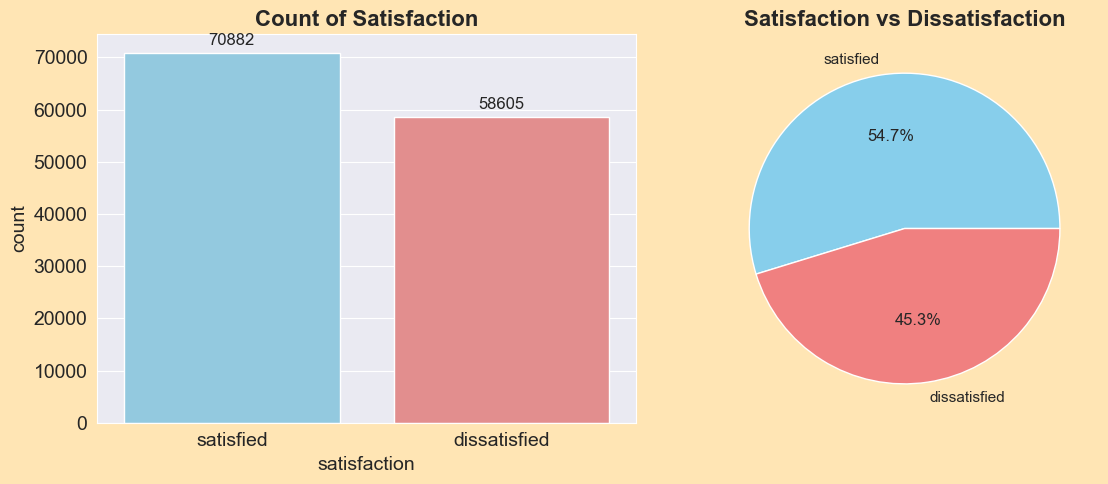

In [15]:
custom_palette = ["#87CEEB", "#F08080"]

# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Countplot
ax1 = sns.countplot(x="satisfaction", data=df, palette=custom_palette, ax=axes[0])
sns.set(rc={"figure.figsize": (4, 4)})

# Adding labels to the countplot bars
for bars in ax1.patches:
    ax1.annotate(format(bars.get_height(), '.0f'), 
                (bars.get_x() + bars.get_width() / 2., bars.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

ax1.set_title("Count of Satisfaction", fontweight="bold", fontsize=16)

# Pie Chart
ax2 = axes[1]

labels = df["satisfaction"].value_counts().index
types = df["satisfaction"].value_counts()
custom_colors = ["skyblue", "lightcoral"]

ax2.pie(types, labels=labels, autopct="%1.1f%%", colors=custom_colors)
ax2.set_title("Satisfaction vs Dissatisfaction", fontweight="bold", fontsize=16)

plt.tight_layout()

plt.show()

###### From the above fig., we can see that there are 70882 customers who are satisfied and 58605 who are not satisfied. Most of the customers are satisfied as we can see their percentage distribution also which can clearly say thst 54.7% customers are satisfied as compared to 45.3% of the customers who are dissatisfied.

# 2) Satisfaction / Dissatisfaction based on Age

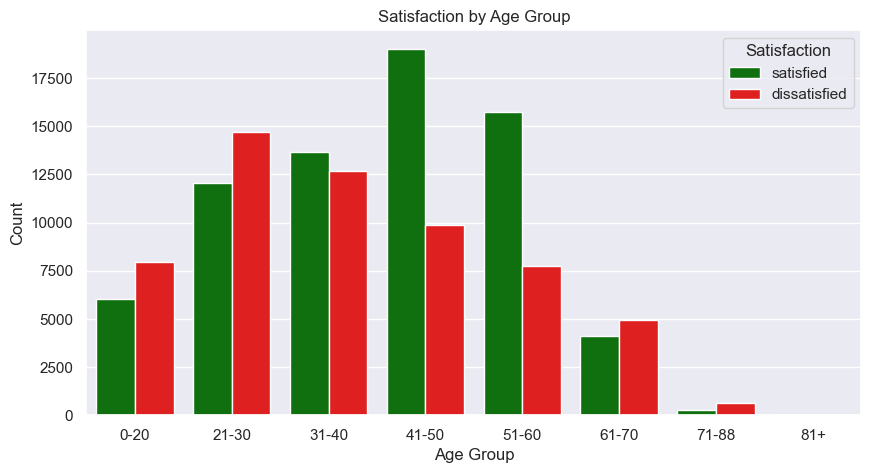

In [16]:
plt.figure(figsize=(10, 5))
unique_satisfaction_values = df['satisfaction'].unique()
palette = {value: "green" if value.lower() == "satisfied" else "red" for value in unique_satisfaction_values}
sns.countplot(data=df, x='Age Group', hue='satisfaction', palette=palette)
plt.title('Satisfaction by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title="Satisfaction", loc="upper right", labels=unique_satisfaction_values)
plt.show()

###### From the above fig., we can see that 41-50 age of customers are mostly satisfied whereas 21-30 age of customers are not satisfied.

# 3) Satisfaction vs Dissatisfaction based on Class of Travel

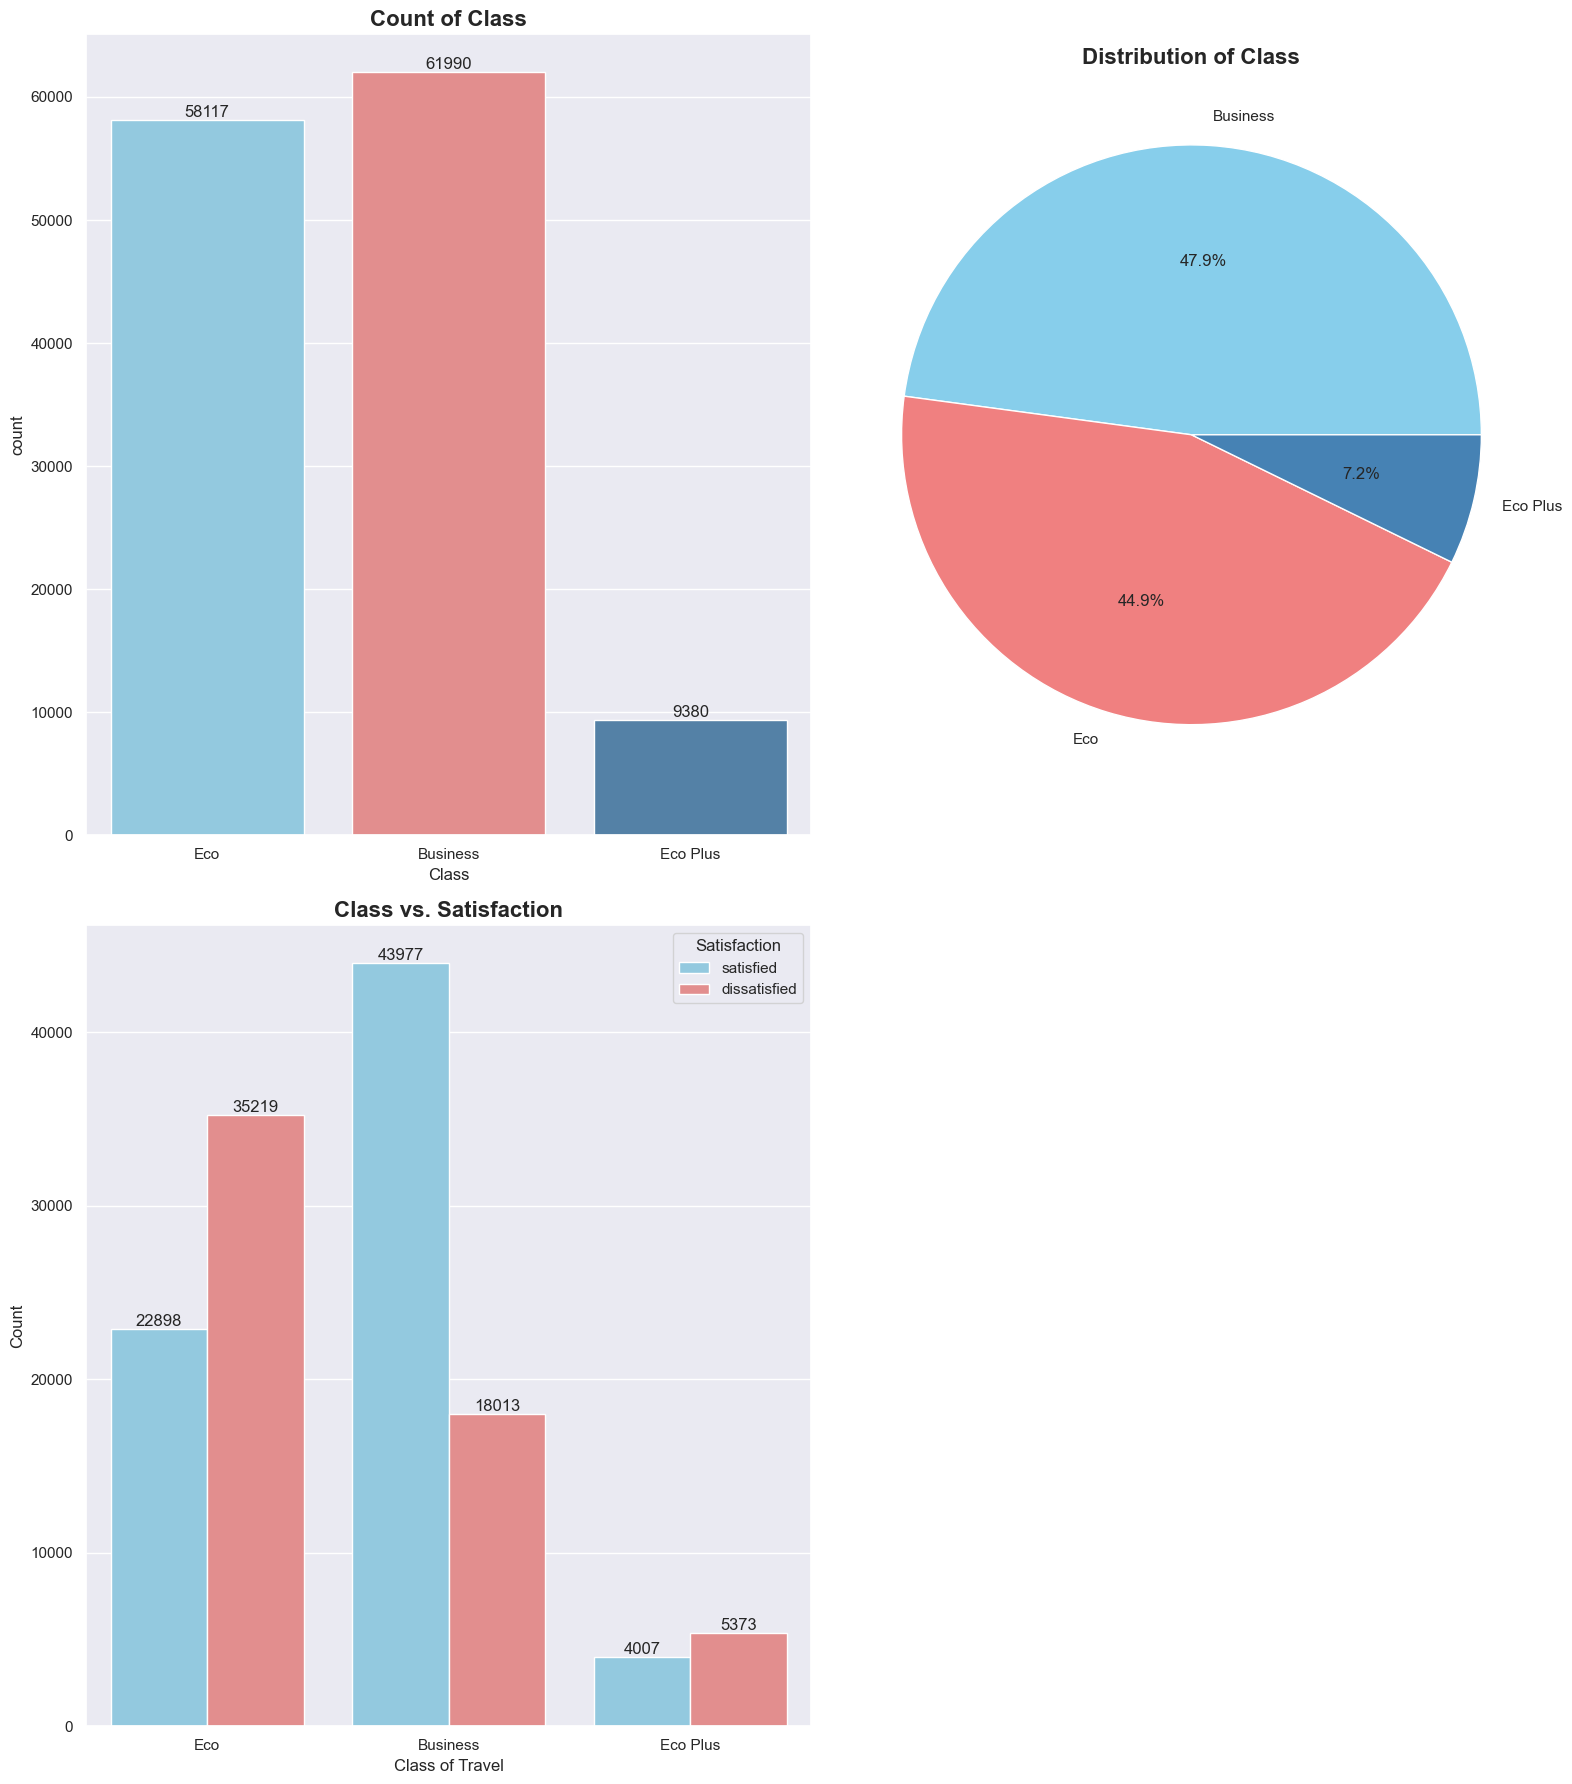

In [17]:
custom_palette = ["#87CEEB", "#F08080", "#4682B4"]
custom_colors = ["skyblue", "lightcoral", "steelblue"]
# Creating subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 18))
# Countplot
ax1 = sns.countplot(x="Class", data=df, palette=custom_palette, ax=axes[0, 0])
for bars in ax1.containers:
    ax1.bar_label(bars)
ax1.set_title("Count of Class", fontweight="bold", fontsize=16)
labels = df["Class"].value_counts().index
types = df["Class"].value_counts()
# Piechart
ax2 = axes[0, 1]
ax2.pie(types, labels=labels, autopct="%1.1f%%", colors=custom_colors)
ax2.set_title("Distribution of Class", fontweight="bold", fontsize=16)
# Countplot with hue
ax3 = sns.countplot(x="Class", hue="satisfaction", data=df, palette={value: custom_colors[i] for i, value in enumerate(df["satisfaction"].unique())}, ax=axes[1, 0])
for bars in ax3.containers:
    ax3.bar_label(bars)
ax3.set_title("Class vs. Satisfaction", fontweight="bold", fontsize=16)
ax3.set_xlabel("Class of Travel")
ax3.set_ylabel("Count")
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=0)
ax3.legend(title="Satisfaction", loc="upper right", labels=df["satisfaction"].unique())
# Turning off the axis in the last subplot
axes[1, 1].axis('off')
plt.tight_layout()
plt.show()

###### From the above fig., we can see that there are 47.9% customers i.e. 61990 customers who are from business class. Economy (Eco) customers typically have standard seating with limited legroom and pay a lower fare, while Economy Plus customers enjoy extra legroom, greatercomfort, and pay a premium for their seats. Economy Plus(eco plus) offers an upgraded travel experience with amenities such as priority boarding, better meals, and more space. From the fig., we can see that 7.2% customers i.e. 9380 are from eco plus and 44.9% customers i.e. 58117 are from eco. Mostly Business class customers are satisfied i.e. 43977 customers. Eco customers are significantly dissatisfied i.e. 35219. The satisfaction and dissatisfaction numbers of Eco Plus customers are almost similar and less.

# 4) Satisfaction vs Dissatisfaction based on Type of Travel

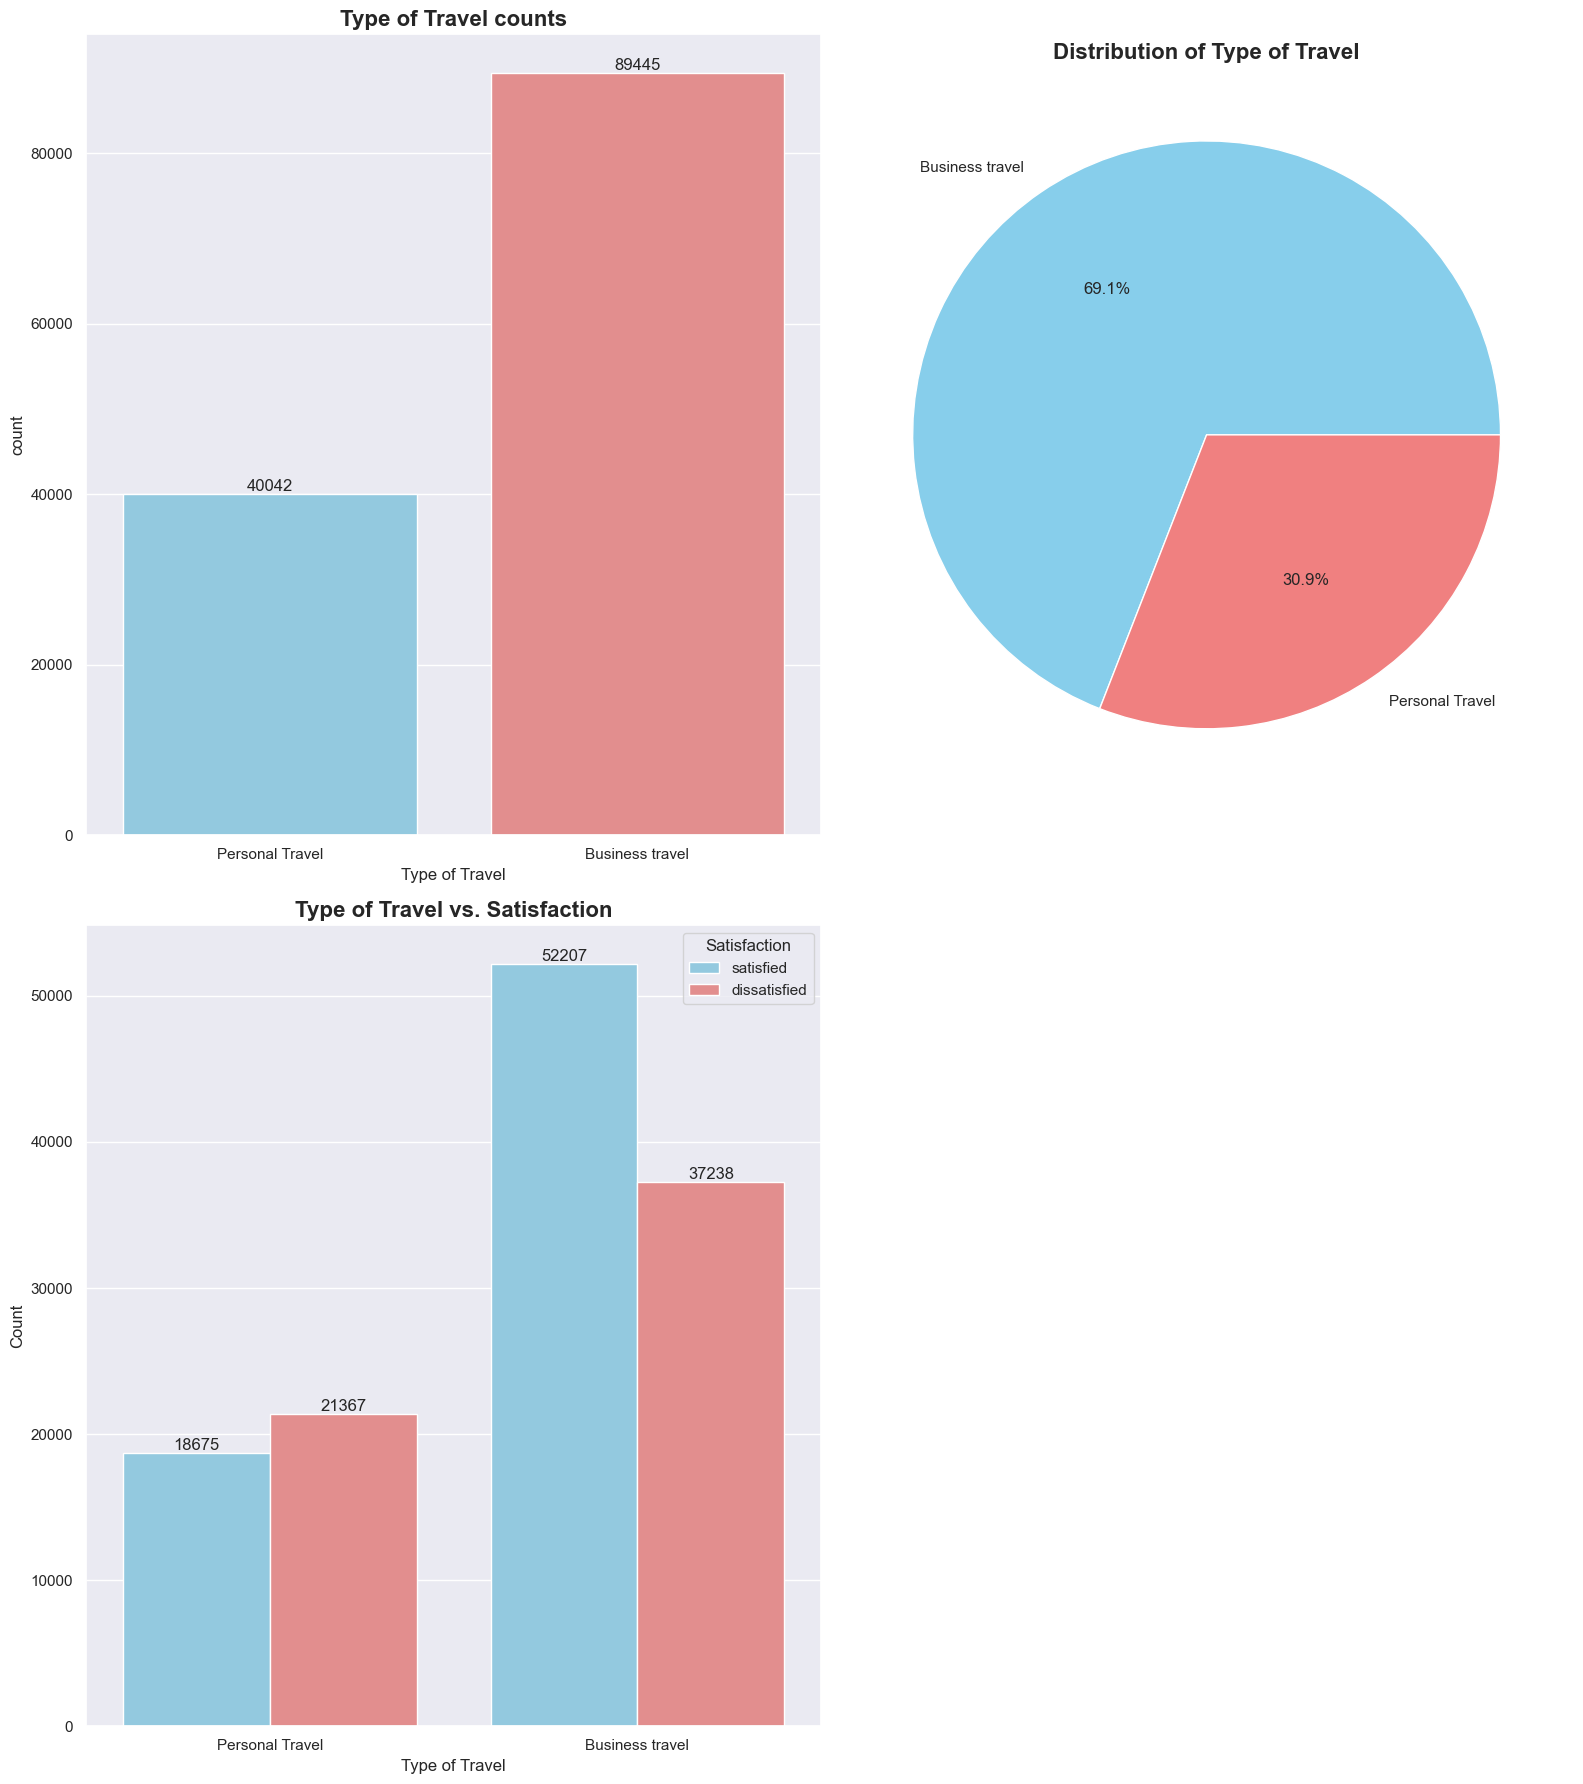

In [18]:
custom_palette = ["#87CEEB", "#F08080"]
custom_colors = ["skyblue", "lightcoral"]
# Creating subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 18))
# Countplot
ax1 = sns.countplot(x="Type of Travel", data=df, palette=custom_palette, ax=axes[0, 0])
for bars in ax1.containers:
    ax1.bar_label(bars)
ax1.set_title("Type of Travel counts", fontweight="bold", fontsize=16)
labels = df["Type of Travel"].value_counts().index
types = df["Type of Travel"].value_counts()
# Piechart
ax2 = axes[0, 1]
ax2.pie(types, labels=labels, autopct="%1.1f%%", colors=custom_colors)
ax2.set_title("Distribution of Type of Travel", fontweight="bold", fontsize=16)
# Countplot with hue
unique_satisfaction_values = df["satisfaction"].unique()
hue_palette = {value: custom_palette[i % len(custom_palette)] for i, value in enumerate(unique_satisfaction_values)}
ax3 = sns.countplot(x="Type of Travel", hue="satisfaction", data=df, palette=hue_palette, ax=axes[1, 0])
for bars in ax3.containers:
    ax3.bar_label(bars)
ax3.set_title("Type of Travel vs. Satisfaction", fontweight="bold", fontsize=16)
ax3.set_xlabel("Type of Travel")
ax3.set_ylabel("Count")
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=0)
ax3.legend(title="Satisfaction", loc="upper right", labels=unique_satisfaction_values)
# Turning off the axis in the last subplot
axes[1, 1].axis('off')
plt.tight_layout()
plt.show()


###### From the fig., we can see that the 69.1% customers i.e. 89445 are travelling for business purposes. And 30.9% customers i.e 40042 are personal travelers. Business travelers are mostly satisfied i.e. 52207 customers. But similarly we can see that Business travelers are highly dissatisfied i.e. 37238.

# 5) Satisfaction vs Dissatisfaction based on Type of Customer

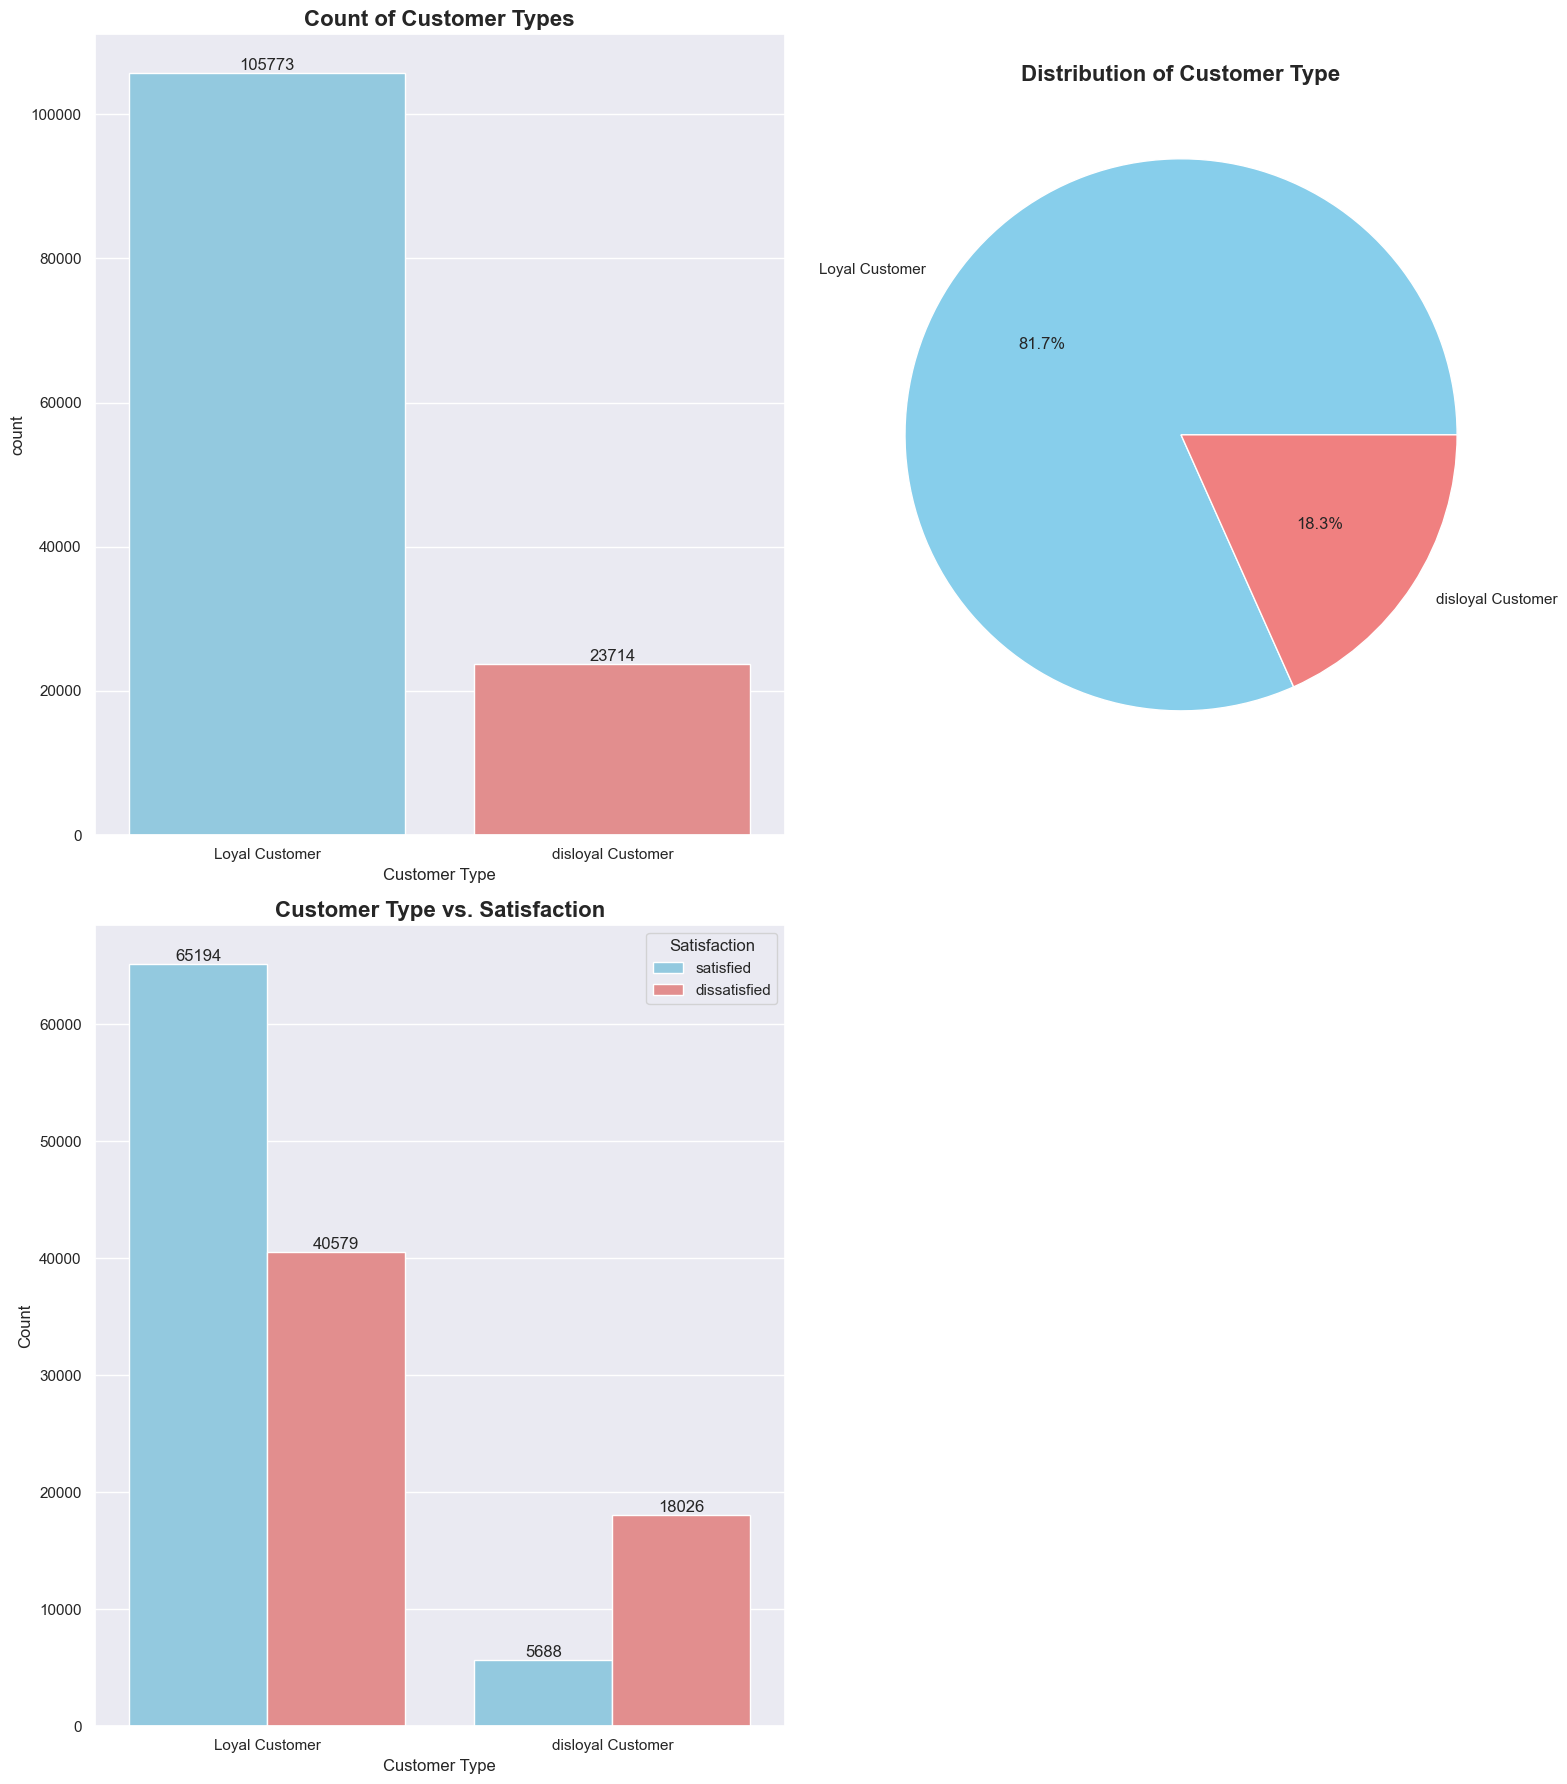

In [19]:
custom_palette = ["#87CEEB", "#F08080"]
custom_colors = ["skyblue", "lightcoral"]
# Creating the subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 18))
# Countplot
ax1 = sns.countplot(x="Customer Type", data=df, palette=custom_palette, ax=axes[0, 0])
for bars in ax1.containers:
    ax1.bar_label(bars)
ax1.set_title("Count of Customer Types", fontweight="bold", fontsize=16)
labels = df["Customer Type"].value_counts().index
types = df["Customer Type"].value_counts()
# Piechart
ax2 = axes[0, 1]
ax2.pie(types, labels=labels, autopct="%1.1f%%", colors=custom_colors)
ax2.set_title("Distribution of Customer Type", fontweight="bold", fontsize=16)
# Countplot with hue
unique_satisfaction_values = df["satisfaction"].unique()
hue_palette = {value: custom_palette[i % len(custom_palette)] for i, value in enumerate(unique_satisfaction_values)}
ax3 = sns.countplot(x="Customer Type", hue="satisfaction", data=df, palette=hue_palette, ax=axes[1, 0])
for bars in ax3.containers:
    ax3.bar_label(bars)
ax3.set_title("Customer Type vs. Satisfaction", fontweight="bold", fontsize=16)
ax3.set_xlabel("Customer Type")
ax3.set_ylabel("Count")
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=0)
ax3.legend(title="Satisfaction", loc="upper right", labels=unique_satisfaction_values)
# Turning off the axis in the last subplot
axes[1, 1].axis('off')
plt.tight_layout()
plt.show()

###### From the above fig., we can see that 81.7% customers i.e. 105773 are loyal as compared to dissloyal customers which is 18.3% i.e. 23714. Satisfaction and Dissatisfaction responses are mostly from Loyal Customers. The number of loyal type customers i.e. 65194 are highly satisfied.

# 6) Satisfaction vs Dissatisfaction based on Ratings

###### Airline ratings typically use a scale of 0 to 5, with each number having a specific meaning or interpretation:
0. Poor - This rating suggests a very unsatisfactory experience with the airline, often indicating
severe issues such as delays, cancellations, poor customer service, or uncomfortable
conditions.
1. Below Average - A rating of 1 means that the airline's performance falls below the average
standard. It might involve issues like limited amenities, average service quality, or occasional
delays.
2. Average - This rating indicates that the airline provides a standard, middle-of-the-road
experience. Nothing outstanding but no significant problems either. It's an okay choice for most
travelers.
3. Good - Arating of 3 signifies that the airline offers a positive experience overall. It may have
good customer service, on-time performance, and reasonable comfort.
4. Very Good - Arating of 4 suggests that the airline is an excellent choice, offering high-quality
service, exceptional amenities, and a very comfortable travel experience.
5. Excellent - This is the highest rating, indicating an exceptional airline experience. Such
airlines often go above and beyond in terms of customer service, punctuality, and in-flight
services.

# Seat Comfort

In [20]:
counts = df["Seat comfort"].value_counts()

['satisfied' 'dissatisfied']


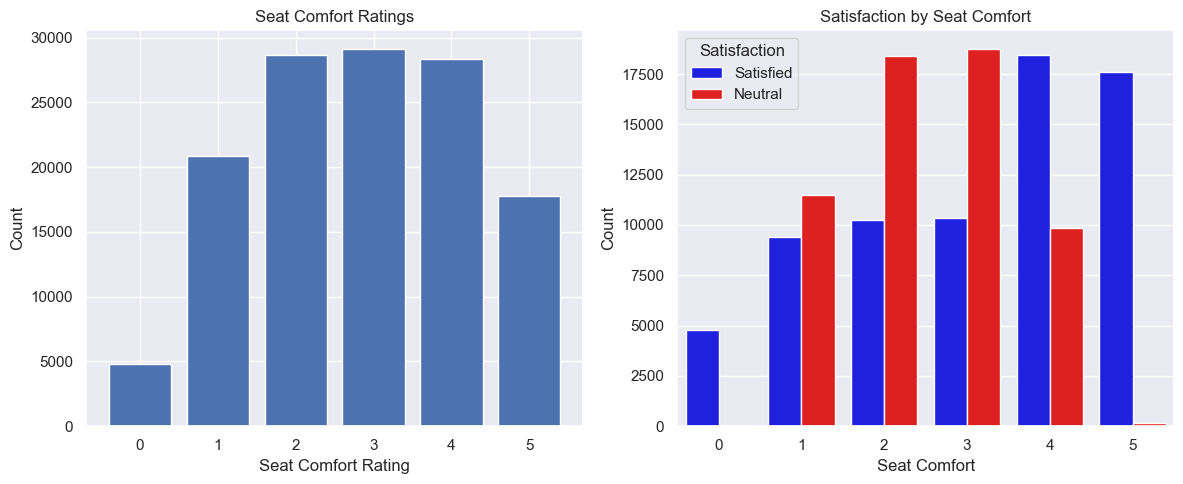

In [21]:
plt.figure(figsize=(12, 5))
# Create the first subplot i.e. bar plot
plt.subplot(1, 2, 1)
# Assuming 'counts' is a Pandas Series
plt.bar(counts.index, counts)
plt.xlabel('Seat Comfort Rating')
plt.ylabel('Count')
plt.title('Seat Comfort Ratings')
# Create the second subplot i.e. countplot
plt.subplot(1, 2, 2)
# Check unique values in the 'satisfaction' column
print(df['satisfaction'].unique())
# Update the 'palette' dictionary based on the unique values
palette = {"satisfied": "blue", "neutral": "gray", "dissatisfied": "red"}
sns.countplot(data=df, x='Seat comfort', hue='satisfaction', palette=palette)
plt.title('Satisfaction by Seat Comfort')
plt.xlabel('Seat Comfort')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title="Satisfaction", loc="upper left", labels=["Satisfied", "Neutral", "Dissatisfied"])
plt.tight_layout()
plt.show()

###### From the above fig., we can clearly see that most of the customers gave 3 star rating to the airlines for Seat comfort. 3 star ratings given by customers are highly not satisfied.


# Ratings Analysis of the following:-

###### 'Departure/Arrival time convenient’, ‘Food and drink’, 'Gate location’, ‘Inflight wifi service" "Inflight entertai,nment' 'Online support, ‘Ease of Online bo,oking' ‘On-board service’, 'Leg room service’, ‘Baggage handling’, ‘Checkin service', ‘Cleanliness’, 'Online boarding’.

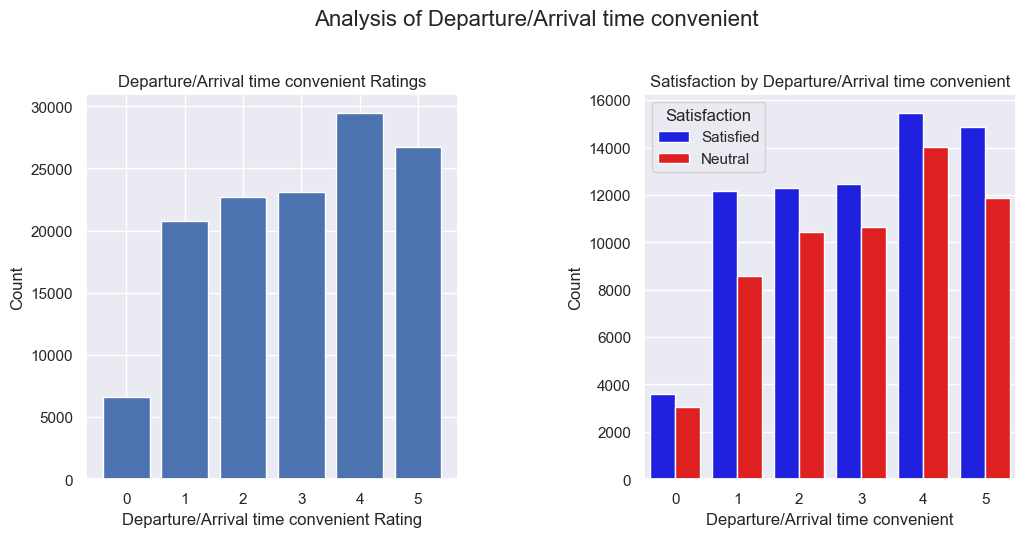

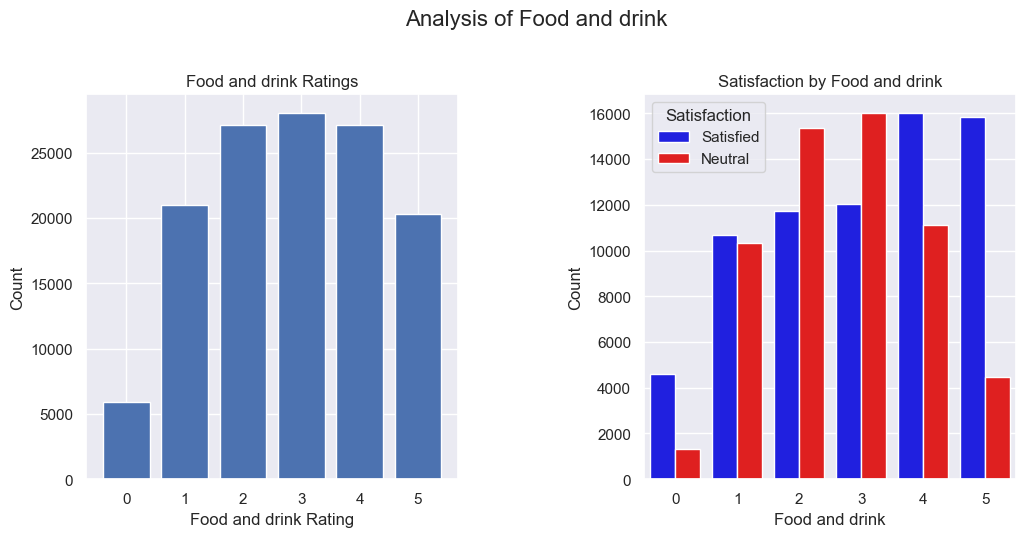

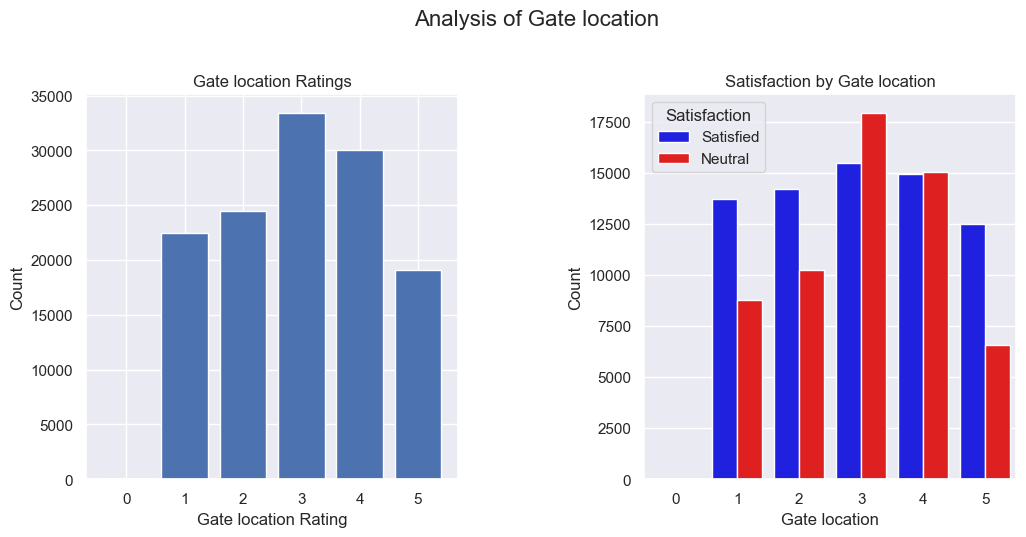

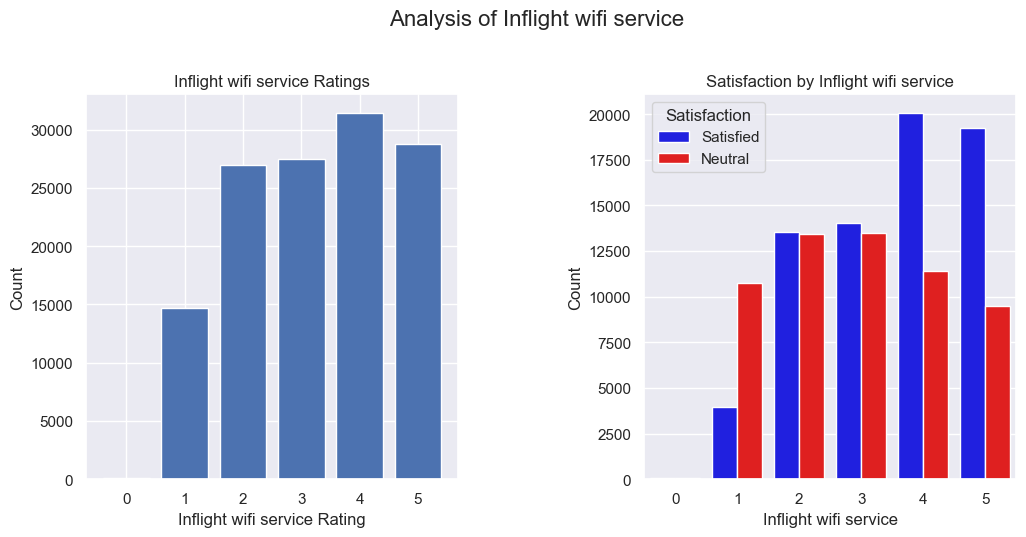

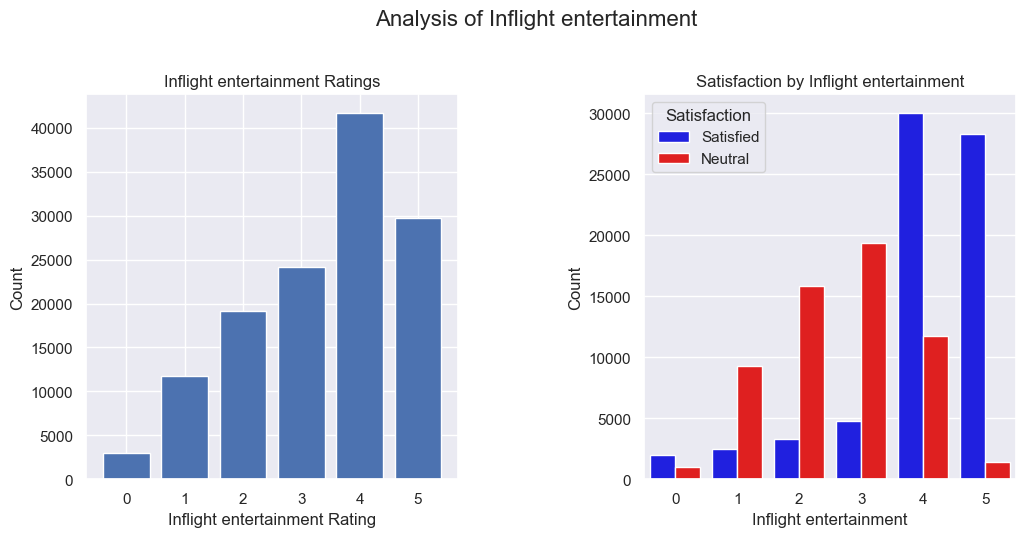

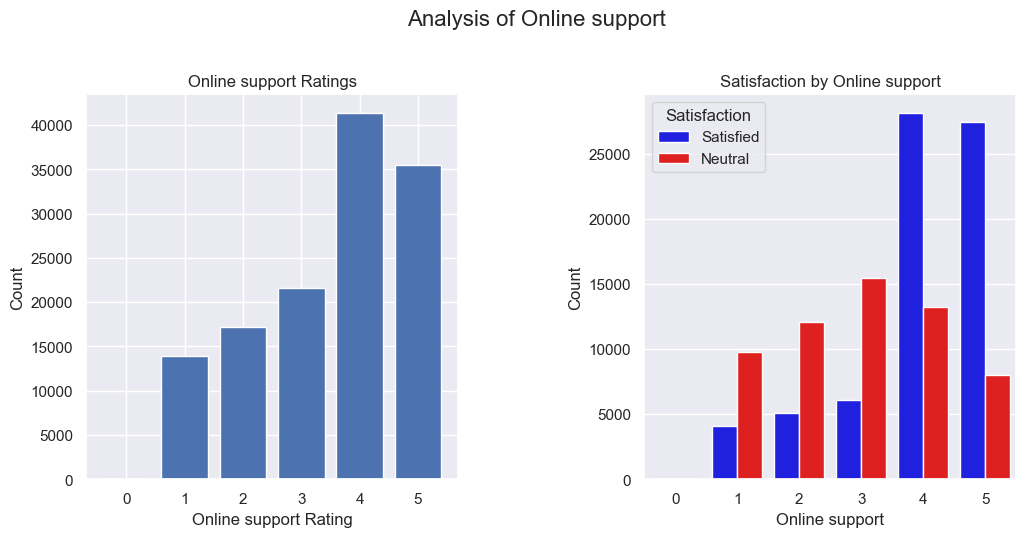

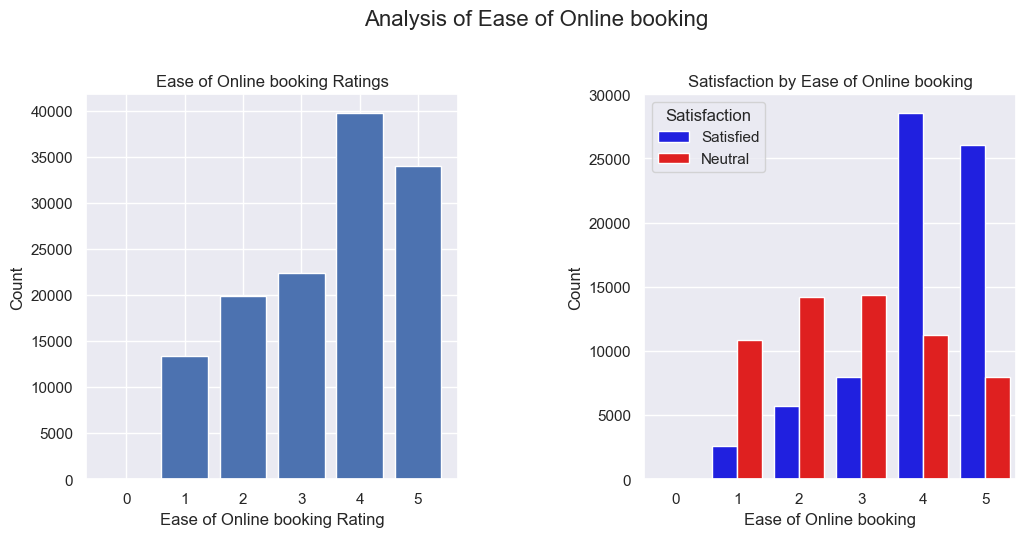

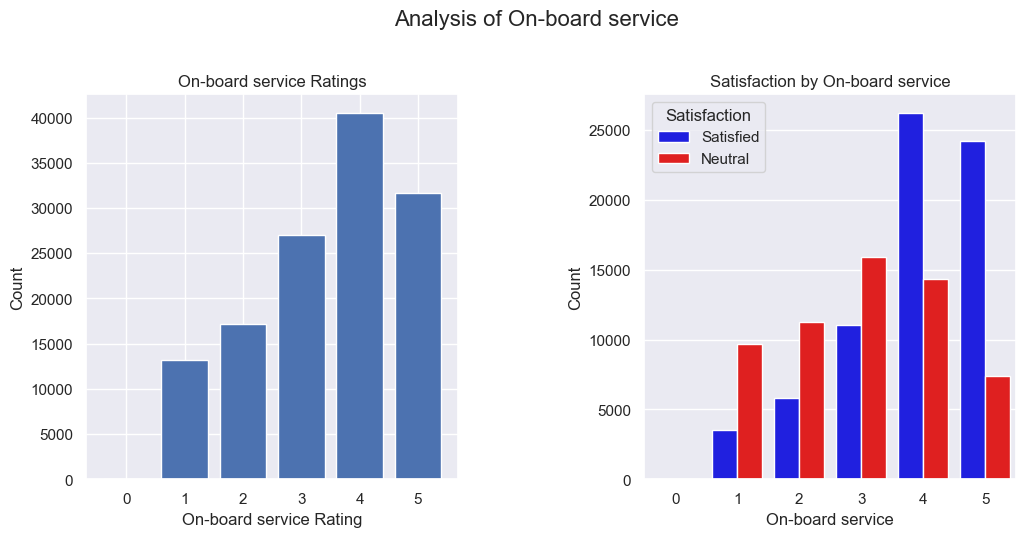

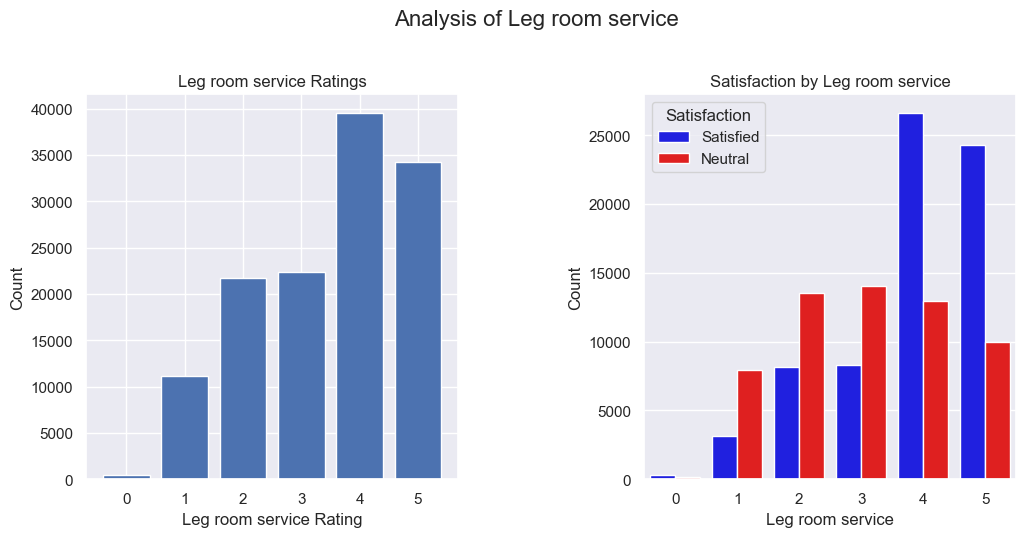

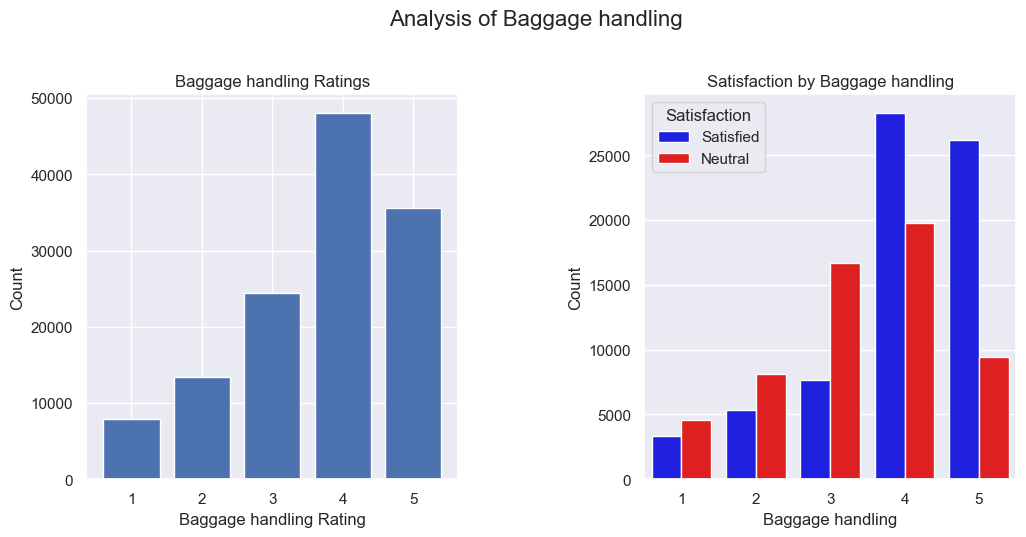

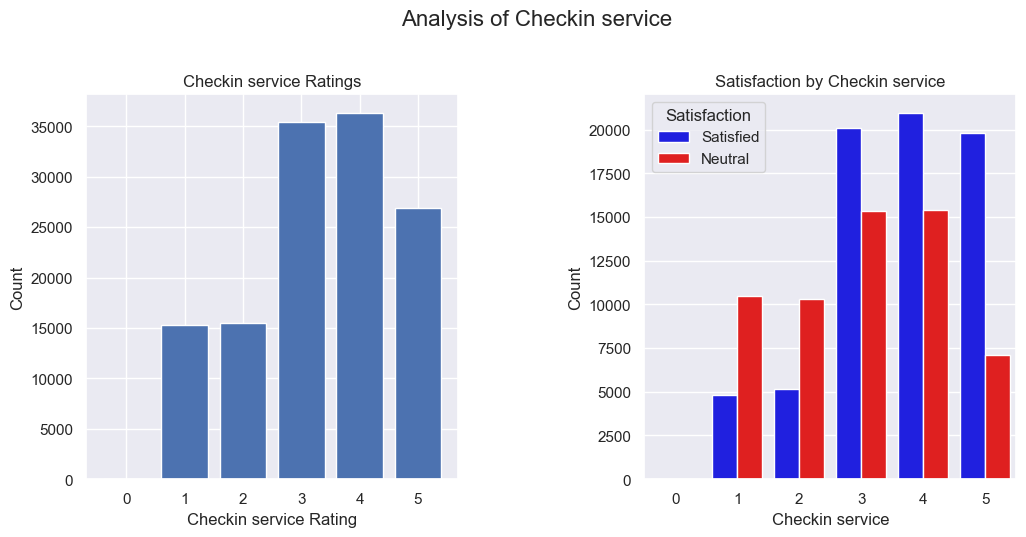

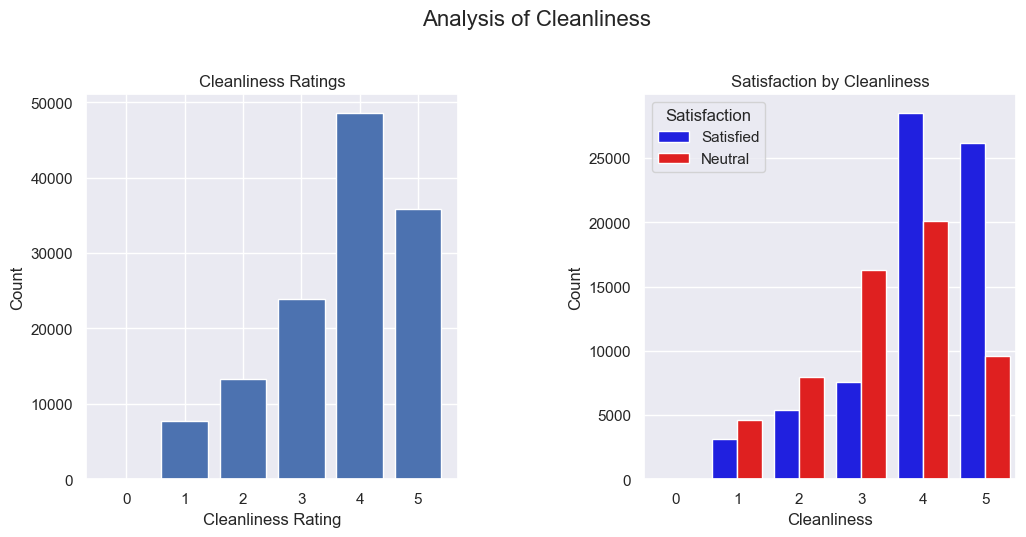

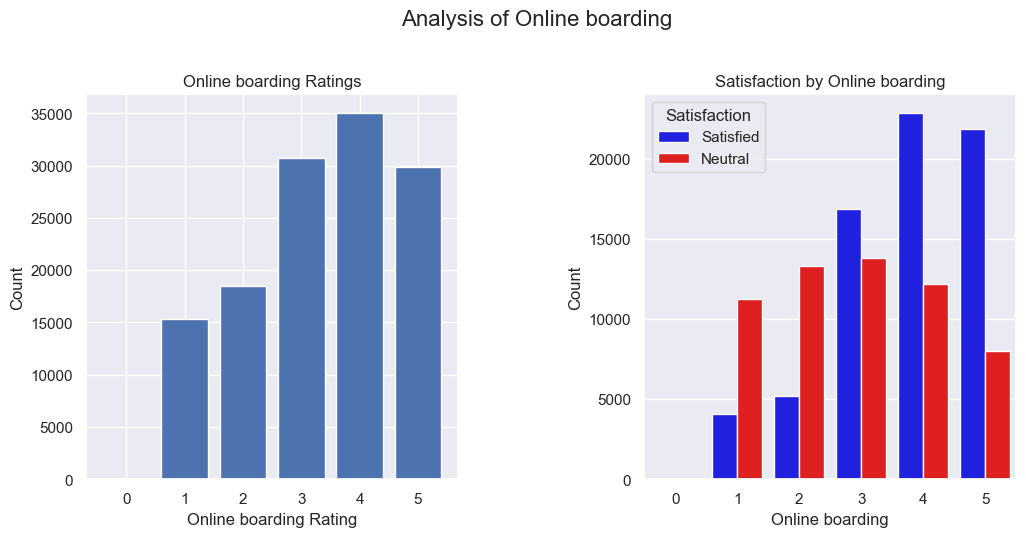

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

def create_subplot(variable, df):
    counts = df[variable].value_counts()
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    axes[0].bar(counts.index, counts)
    axes[0].set_xlabel(f'{variable} Rating')
    axes[0].set_ylabel('Count')
    axes[0].set_title(f'{variable} Ratings')

    sns.countplot(data=df, x=variable, hue='satisfaction', palette={"satisfied": "blue", "neutral": "gray", "dissatisfied": "red"}, ax=axes[1])
    axes[1].set_title(f'Satisfaction by {variable}')
    axes[1].set_xlabel(variable)
    axes[1].set_ylabel('Count')
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
    axes[1].legend(title="Satisfaction", loc="upper left", labels=["Satisfied", "Neutral", "Dissatisfied"])

    # Adjust spacing between subplots
    plt.subplots_adjust(wspace=0.5)  # You can increase this value for more spacing

    # Add titles to each plot
    plt.suptitle(f'Analysis of {variable}', fontsize=16, y=1.05)  # Adjust the y value for vertical space
    plt.show()

variables_to_visualize = [
    'Departure/Arrival time convenient',
    "Food and drink",
    "Gate location",
    "Inflight wifi service",
    "Inflight entertainment",
    "Online support",
    "Ease of Online booking",
    "On-board service",
    "Leg room service",
    "Baggage handling",
    "Checkin service",
    "Cleanliness",
    "Online boarding"
]

for variable in variables_to_visualize:
    create_subplot(variable, df)


###### From the above figures, we can see that maximum customers gave 4 star ratings for Departure/Arrival time convenient, inflight wifi service, inflight entertainment, online support,ease of online booking, On-board service, leg room service, baggage handling, checkin-service, cleanliness and online boarding. But they give 3 star rating for Food and Drink. It means they are mostly satisfied for all the factors but unsatisfied in Food and Drink and Gate Location.

# Outlier Detection

In [23]:
columns_to_check = ["Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]

# Function to detect outliers using IQR
def detect_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Loop through the specified columns and detect outliers
for column in columns_to_check:
    outliers = detect_outliers(column)
    print(f"Outliers in {column}:")
    print(outliers)


Outliers in Flight Distance:
        satisfaction  Gender      Customer Type   Type of Travel     Class  \
540        satisfied  Female     Loyal Customer  Personal Travel       Eco   
588        satisfied  Female     Loyal Customer  Personal Travel  Business   
1160    dissatisfied    Male     Loyal Customer  Personal Travel       Eco   
1161    dissatisfied  Female     Loyal Customer  Personal Travel       Eco   
1664    dissatisfied    Male     Loyal Customer  Personal Travel       Eco   
...              ...     ...                ...              ...       ...   
129402     satisfied  Female     Loyal Customer  Business travel  Business   
129420     satisfied    Male     Loyal Customer  Business travel  Business   
129528     satisfied  Female     Loyal Customer  Business travel  Business   
129580     satisfied  Female     Loyal Customer  Business travel  Business   
129778  dissatisfied  Female  disloyal Customer  Personal Travel       Eco   

        Flight Distance  Seat comf

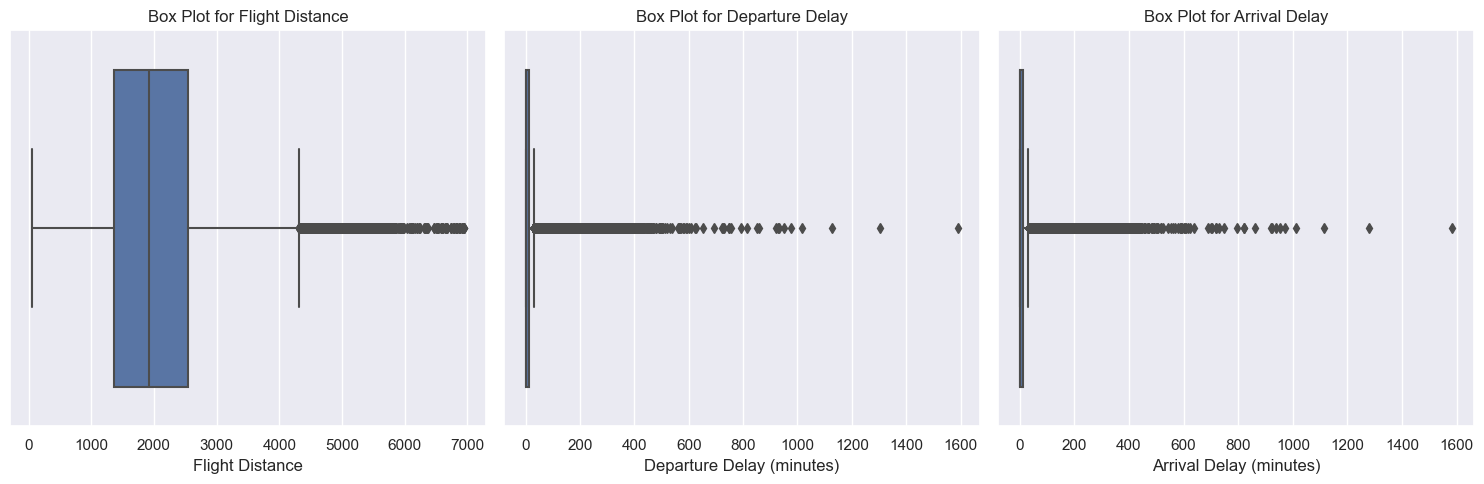

In [24]:
 #visualizing outliers through boxplot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(x=df["Flight Distance"], ax=axes[0])
axes[0].set_xlabel("Flight Distance")
axes[0].set_title("Box Plot for Flight Distance")

sns.boxplot(x=df["Departure Delay in Minutes"], ax=axes[1])
axes[1].set_xlabel("Departure Delay (minutes)")
axes[1].set_title("Box Plot for Departure Delay")

sns.boxplot(x=df["Arrival Delay in Minutes"], ax=axes[2])
axes[2].set_xlabel("Arrival Delay (minutes)")
axes[2].set_title("Box Plot for Arrival Delay")

plt.tight_layout()
plt.show()


###### From the above fig., we can clearly see that in the above three variables, there are some outliers.

In [25]:
import numpy as np

# Flight Distance
q1_fd = np.percentile(df["Flight Distance"], 25)
q3_fd = np.percentile(df["Flight Distance"], 75)
iqr_fd = q3_fd - q1_fd

lower_bound_fd = q1_fd - 1.5 * iqr_fd
upper_bound_fd = q3_fd + 1.5 * iqr_fd

# Departure Delay
q1_dd = np.percentile(df["Departure Delay in Minutes"], 25)
q3_dd = np.percentile(df["Departure Delay in Minutes"], 75)
iqr_dd = q3_dd - q1_dd

lower_bound_dd = q1_dd - 1.5 * iqr_dd
upper_bound_dd = q3_dd + 1.5 * iqr_dd

# Arrival Delay
q1_ad = np.percentile(df["Arrival Delay in Minutes"], 25)
q3_ad = np.percentile(df["Arrival Delay in Minutes"], 75)
iqr_ad = q3_ad - q1_ad

lower_bound_ad = q1_ad - 1.5 * iqr_ad
upper_bound_ad = q3_ad + 1.5 * iqr_ad

print("Flight Distance:")
print("Lower bound:", lower_bound_fd)
print("Upper bound:", upper_bound_fd)

print("\nDeparture Delay:")
print("Lower bound:", lower_bound_dd)
print("Upper bound:", upper_bound_dd)

print("\nArrival Delay:")
print("Lower bound:", lower_bound_ad)
print("Upper bound:", upper_bound_ad)


Flight Distance:
Lower bound: -417.0
Upper bound: 4319.0

Departure Delay:
Lower bound: -18.0
Upper bound: 30.0

Arrival Delay:
Lower bound: -19.5
Upper bound: 32.5


In [26]:
# Flight Distance
df["Flight Distance"] = np.where(df["Flight Distance"] > upper_bound_fd, upper_bound_fd, df["Flight Distance"])
df["Flight Distance"] = np.where(df["Flight Distance"] < lower_bound_fd, lower_bound_fd, df["Flight Distance"])

# Departure Delay
df["Departure Delay in Minutes"] = np.where(df["Departure Delay in Minutes"] > upper_bound_dd, upper_bound_dd, df["Departure Delay in Minutes"])
df["Departure Delay in Minutes"] = np.where(df["Departure Delay in Minutes"] < lower_bound_dd, lower_bound_dd, df["Departure Delay in Minutes"])

# Arrival Delay
df["Arrival Delay in Minutes"] = np.where(df["Arrival Delay in Minutes"] > upper_bound_ad, upper_bound_ad, df["Arrival Delay in Minutes"])
df["Arrival Delay in Minutes"] = np.where(df["Arrival Delay in Minutes"] < lower_bound_ad, lower_bound_ad, df["Arrival Delay in Minutes"])


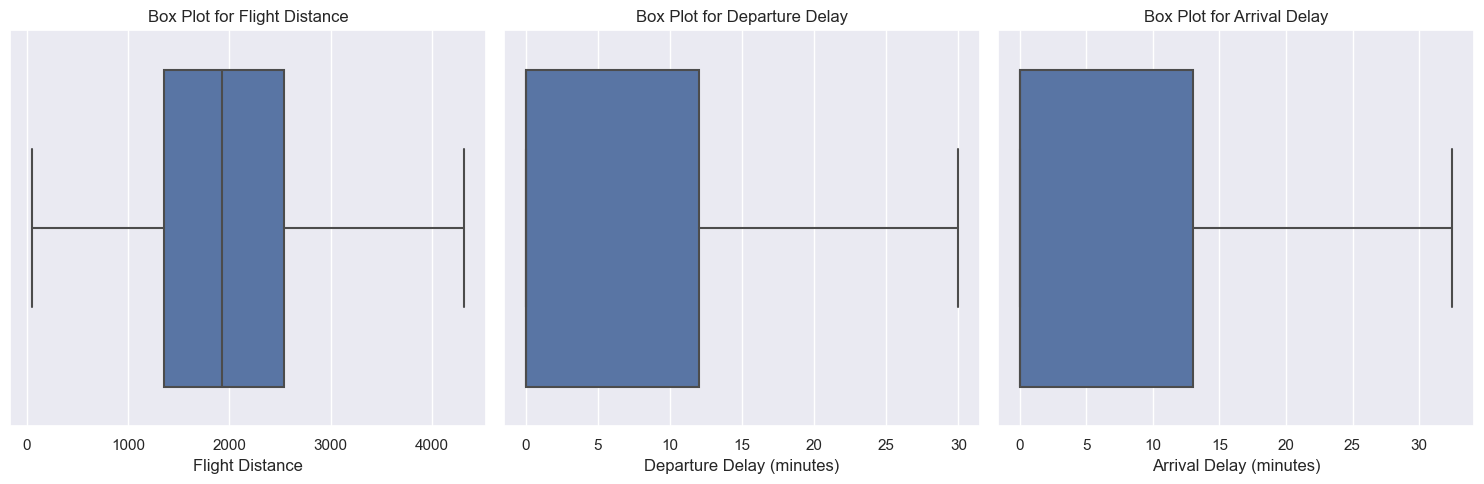

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(x=df["Flight Distance"], ax=axes[0])
axes[0].set_xlabel("Flight Distance")
axes[0].set_title("Box Plot for Flight Distance")

sns.boxplot(x=df["Departure Delay in Minutes"], ax=axes[1])
axes[1].set_xlabel("Departure Delay (minutes)")
axes[1].set_title("Box Plot for Departure Delay")

sns.boxplot(x=df["Arrival Delay in Minutes"], ax=axes[2])
axes[2].set_xlabel("Arrival Delay (minutes)")
axes[2].set_title("Box Plot for Arrival Delay")

plt.tight_layout()
plt.show()


###### From the above fig., we can see that all the outliers are treated.

# Conversion of categorical to numerical

In [28]:
df["satisfaction"] = np.where(df.satisfaction == "satisfied", 1,0)

In [29]:
df.head(3)

,satisfaction,Gender,Customer Type,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Age Group
0,1,Female,Loyal Customer,Personal Travel,Eco,265.0,0,0,0,2,...,3,3,0,3,5,3,2,0.0,0.0,61-70
1,1,Male,Loyal Customer,Personal Travel,Business,2464.0,0,0,0,3,...,3,4,4,4,2,3,2,30.0,32.5,41-50
2,1,Female,Loyal Customer,Personal Travel,Eco,2138.0,0,0,0,3,...,2,3,3,4,4,4,2,0.0,0.0,0-20


In [30]:
le = LabelEncoder()

df[ "Customer Type"] = le.fit_transform(df["Customer Type"])
df["Type of Travel"] = le.fit_transform(df["Type of Travel"])
df["Class"] = le.fit_transform(df["Class"])

df.head(3)

,satisfaction,Gender,Customer Type,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Age Group
0,1,Female,0,1,1,265.0,0,0,0,2,...,3,3,0,3,5,3,2,0.0,0.0,61-70
1,1,Male,0,1,0,2464.0,0,0,0,3,...,3,4,4,4,2,3,2,30.0,32.5,41-50
2,1,Female,0,1,1,2138.0,0,0,0,3,...,2,3,3,4,4,4,2,0.0,0.0,0-20


In [31]:
df2 = pd.get_dummies(df, columns=["Age Group"])

# Exclude non-numeric columns from the conversion
numeric_columns = df2.select_dtypes(include='number').columns
df2[numeric_columns] = df2[numeric_columns].astype(int)

# Displaying the first few rows
df2.head()


,satisfaction,Gender,Customer Type,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Departure Delay in Minutes,Arrival Delay in Minutes,Age Group_0-20,Age Group_21-30,Age Group_31-40,Age Group_41-50,Age Group_51-60,Age Group_61-70,Age Group_71-88,Age Group_81+
0,1,Female,0,1,1,265,0,0,0,2,...,0,0,0,0,0,0,0,1,0,0
1,1,Male,0,1,0,2464,0,0,0,3,...,30,32,0,0,0,1,0,0,0,0
2,1,Female,0,1,1,2138,0,0,0,3,...,0,0,1,0,0,0,0,0,0,0
3,1,Female,0,1,1,623,0,0,0,3,...,0,0,0,0,0,0,1,0,0,0
4,1,Female,0,1,1,354,0,0,0,3,...,0,0,0,0,0,0,0,1,0,0


# Correlation Analysis

C:\Users\aksha\AppData\Local\Temp\ipykernel_11928\3705957903.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(), cmap="coolwarm")


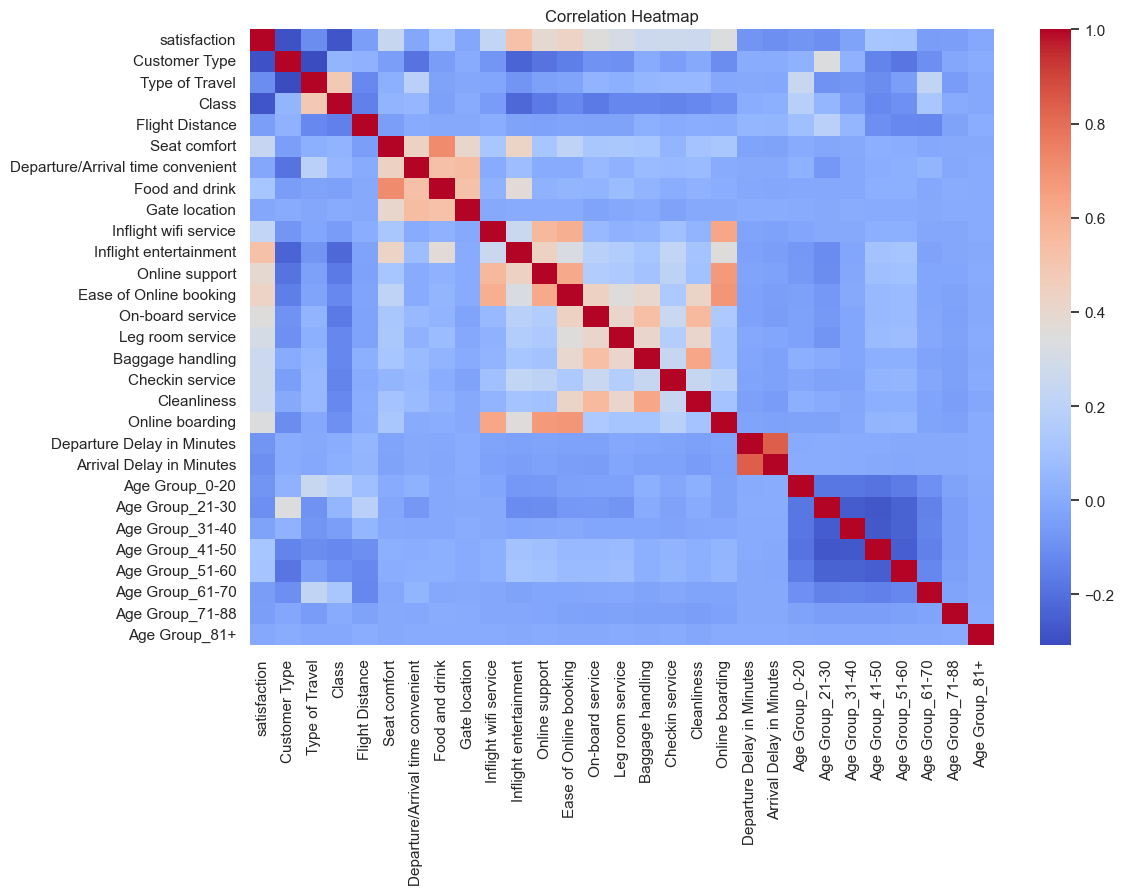

In [32]:
plt.figure(figsize=(12, 8)) # Adjust the figure size to something more appropr
sns.heatmap(df2.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Model Building

In [33]:
x=df2.drop("satisfaction", axis=1)
x.head(3)

,Gender,Customer Type,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,Departure Delay in Minutes,Arrival Delay in Minutes,Age Group_0-20,Age Group_21-30,Age Group_31-40,Age Group_41-50,Age Group_51-60,Age Group_61-70,Age Group_71-88,Age Group_81+
0,Female,0,1,1,265,0,0,0,2,2,...,0,0,0,0,0,0,0,1,0,0
1,Male,0,1,0,2464,0,0,0,3,0,...,30,32,0,0,0,1,0,0,0,0
2,Female,0,1,1,2138,0,0,0,3,2,...,0,0,1,0,0,0,0,0,0,0


In [34]:
y=df2["satisfaction"]

y.head(3)

0    1
1    1
2    1
Name: satisfaction, dtype: int32

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(90640, 29) (90640,)
(38847, 29) (38847,)


In [36]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
x_train['Gender'] = label_encoder.fit_transform(x_train['Gender'])
x_test['Gender'] = label_encoder.transform(x_test['Gender'])


# Decision Tree Classifier

In [37]:
model_dt = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=3)  # Adjust max_depth as needed
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=100)

In [38]:
y_pred=model_dt.predict(x_test)

y_pred


array([1, 0, 0, ..., 0, 0, 0])

In [39]:
print(classification_report(y_test, y_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85     17639
           1       0.88      0.85      0.87     21208

    accuracy                           0.86     38847
   macro avg       0.86      0.86      0.86     38847
weighted avg       0.86      0.86      0.86     38847



###### The current model shows good precision, recall, and an overall F1-score of 0.89, with an accuracy of 90%. It performs well in distinguishing between the two classes.



In [40]:
print(confusion_matrix(y_test, y_pred))

[[15252  2387]
 [ 3181 18027]]


###### The overall accuracy is 89.5%. But, we can explore alternative models to further enhance the F1-score and improve performance, aiming for higher accuracy.

# Random Forest Classifier

In [41]:
model_rf = RandomForestClassifier(n_estimators=100, criterion="gini", random_state=42)
model_rf.fit(x_train, y_train)

y_pred_rf = model_rf.predict(x_test)

In [42]:
 print(classification_report(y_test, y_pred_rf, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     17639
           1       0.97      0.95      0.96     21208

    accuracy                           0.96     38847
   macro avg       0.96      0.96      0.96     38847
weighted avg       0.96      0.96      0.96     38847



###### We got the similar precision, recall anf F1 score as the above model.

In [43]:
print(confusion_matrix(y_test, y_pred_rf))

[[16912   727]
 [  965 20243]]


###### The overall accuracy is same i.e. 89.5%.

# Gradient Boosting Classifier

In [44]:
model_grad = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, min_samples_split=2, min_samples_leaf=1)
model_grad.fit(x_train, y_train)

y_pred_grad = model_grad.predict(x_test)

In [45]:
print(classification_report(y_test, y_pred_grad, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     17639
           1       0.93      0.93      0.93     21208

    accuracy                           0.93     38847
   macro avg       0.93      0.93      0.93     38847
weighted avg       0.93      0.93      0.93     38847



###### The gradient boosting model exhibits significant performance enhancements, with precision, recall, and F1-score all increasing to 0.92, resulting in an impressive accuracy of 92%.

In [46]:
print(confusion_matrix(y_test, y_pred_grad))

[[16175  1464]
 [ 1406 19802]]


###### The overall accuracy got improved to 91.8%.

In [47]:
#saving the model

import pickle

In [48]:
filename="model.sav"

In [49]:
pickle.dump(model_grad, open(filename, 'wb'))

# Load the model from the file
loaded_model = pickle.load(open(filename, 'rb'))

# Use the loaded model to make predictions
y_pred_loaded = loaded_model.predict(x_test)

# Evaluate the performance of the loaded model
accuracy = loaded_model.score(x_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.9261204211393416


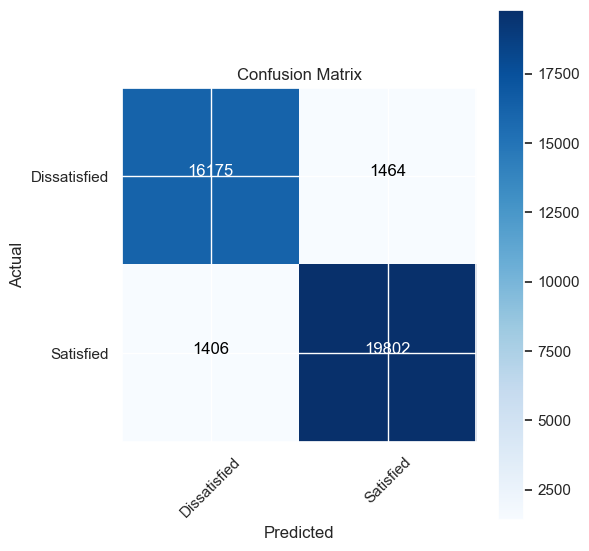

In [50]:
classes = ["Dissatisfied", "Satisfied"]
cm = confusion_matrix(y_test, y_pred_grad)

# Create a figure and axis
plt.figure(figsize=(6, 6))

plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix")

plt.colorbar()

# Add Labels to the plot
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add text annotations for each cell
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], "d"), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel("Actual")
plt.xlabel("Predicted")

plt.tight_layout()
plt.show()


# CONCLUSION:

###### In this project we found the following insights:-

1. 54.7% are satisfied customers as compared to dissatisfied customers.
2. Age group between 41-50 age of customers are highly satisfied.Economy Plus customers.

3. Business class customers are mostly satisfied followed by Economy customers and travellers.

4. Business travellers are more and they are more satisfied as compared to personal

5. 81.7% customers are loyal and highly satisfied as compared to dissloyal which is 18.3%.
6. In terms of ratings, customers are highly satisfied for Departure/Arrival time convenient,inflight wifi service, inflight entertainment, online support, ease of online booking, On-board service, leg room service, baggage handling, checkin-service, cleanliness and onlineboarding as they gave 4 star ratings in these factors which indicates a relatively high level of customer satisfaction.

# Recommendations for improvements:-

###### In conclusion, for better gate location, airlines should use better signs and show real-time information for passengers to find their way easily. To make seats more comfortable, use seats that can be adjusted and are softer to sit on. For food and drinks, offer a variety of options, including healthy choices, and consider different diets to enhance the in-flight dining experience for passengers. And lastly, we can see that the Gradient Boosting Classifier machine learning model delivered comprehensive predictions and insights, enabling us to understand and categorize customer satisfaction levels effectively. This model proves to be a valuable tool for anticipating and addressing customer preferences and concerns in the airline industry.